# **Knock airport** Weather


*Author : Maroua EL imame*

This notebook 'assignment_6_weather.ipynb' is split into 2 parts : 
- 1st part : Plot of the temperature, the mean temperature each day then the mean temperature for each month.  
- 2nd part : Plot of the Windspeed, The rolling windspeed (say over 24 hours), The max windspeed for each day, then The monthly mean of the daily max windspeeds.  

The purpose is to analyze and plot the temperature and windspeed in Knock Airport. 




## Part I : Temperature  
___

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [143]:
# read in the data from the url below, skip rows as the dataframe starts at row 24
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df = pd.read_csv(url, skiprows=23)
df.head((10))

C:\Users\marou\AppData\Local\Temp\ipykernel_27184\1080501189.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
6,31-jul-1996 13:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,0,0,2,11,0.0,40000,43,5
7,31-jul-1996 14:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,0,0,2,11,0.0,50000,45,6
8,31-jul-1996 15:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,0,0,25,82,0.0,8000,45,7
9,31-jul-1996 16:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,0,0,25,82,0.0,35000,40,7


In [144]:
# nrows parameter limits how many lines pd reads from the top of file.  
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
col_description = pd.read_csv(url, nrows=20, header=None, sep=";")  
col_description


,0
0,Station Name: KNOCK AIRPORT
1,Station Height: 201 M
2,"Latitude:53.906 ,Longitude: -8.817"
3,date: - Date and Time (utc)
4,rain: - Precipitation Amount (mm)\t
5,temp: - Air Temperature (C)\t
6,wetb: - Wet Bulb Temperature (C)
7,dewpt: - Dew Point Temperature (C)
8,rhum: - Relative Humidity (%)
9,vappr: - Vapour Pressure (hPa)\t


In [145]:
# dataframe info : Dtype of date column shows an object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256434 entries, 0 to 256433
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    256434 non-null  object 
 1   ind     256434 non-null  int64  
 2   rain    256434 non-null  object 
 3   ind.1   256434 non-null  int64  
 4   temp    256434 non-null  float64
 5   ind.2   256434 non-null  int64  
 6   wetb    256434 non-null  float64
 7   dewpt   256434 non-null  float64
 8   vappr   256434 non-null  float64
 9   rhum    256434 non-null  int64  
 10  msl     256434 non-null  object 
 11  ind.3   256434 non-null  int64  
 12  wdsp    256434 non-null  object 
 13  ind.4   256434 non-null  int64  
 14  wddir   256434 non-null  object 
 15  ww      256434 non-null  object 
 16  w       256434 non-null  object 
 17  sun     256434 non-null  float64
 18  vis     256434 non-null  object 
 19  clht    256434 non-null  object 
 20  clamt   256434 non-null  object 
dtypes: float64

In [146]:
# convert date Dtype into datetime
df['date'] = pd.to_datetime(df['date'])

C:\Users\marou\AppData\Local\Temp\ipykernel_27184\2081386501.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [147]:
# reindexing : set the index of the dataframe to be a date
df.set_index('date',inplace=True)
df

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-31 20:00:00,0,0.0,0,8.6,0,7.8,6.8,9.9,89,984.0,2,13,2,160,,,0.0,35000,90,8
2025-10-31 21:00:00,0,0.0,0,8.3,0,7.8,7.2,10.2,93,983.5,2,13,2,160,,,0.0,22000,90,8
2025-10-31 22:00:00,0,0.5,0,7.8,0,7.6,7.3,10.3,97,983.1,2,10,2,160,,,0.0,6000,43,8


In [148]:
# add df index as a column
df['date'] = df.index
df['date']


date
1996-04-10 14:00:00   1996-04-10 14:00:00
1996-07-31 08:00:00   1996-07-31 08:00:00
1996-07-31 09:00:00   1996-07-31 09:00:00
1996-07-31 10:00:00   1996-07-31 10:00:00
1996-07-31 11:00:00   1996-07-31 11:00:00
                              ...        
2025-10-31 20:00:00   2025-10-31 20:00:00
2025-10-31 21:00:00   2025-10-31 21:00:00
2025-10-31 22:00:00   2025-10-31 22:00:00
2025-10-31 23:00:00   2025-10-31 23:00:00
2025-11-01 00:00:00   2025-11-01 00:00:00
Name: date, Length: 256434, dtype: datetime64[ns]

In [149]:
# show temperature column
df['temp']

date
1996-04-10 14:00:00    11.5
1996-07-31 08:00:00    11.5
1996-07-31 09:00:00    11.6
1996-07-31 10:00:00    12.9
1996-07-31 11:00:00    14.5
                       ... 
2025-10-31 20:00:00     8.6
2025-10-31 21:00:00     8.3
2025-10-31 22:00:00     7.8
2025-10-31 23:00:00     7.4
2025-11-01 00:00:00     7.4
Name: temp, Length: 256434, dtype: float64

### 1.1 Temperature _1996-2025_   

<Axes: xlabel='date', ylabel='temp'>

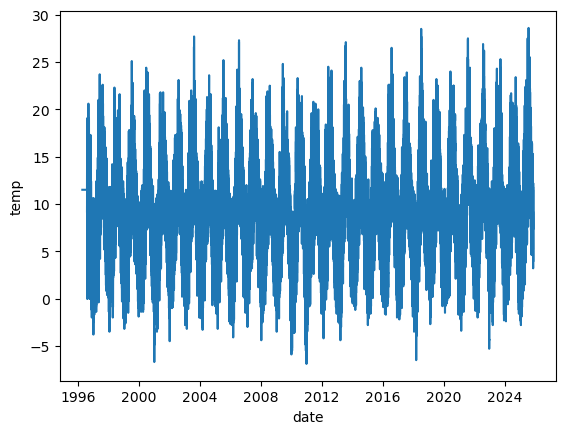

In [150]:
# plot temperature each day/hour from 1996 to 2025
sns.lineplot(data=df, x='date', y='temp')


The plot is too dense with hourly data over multiple years. To improve the visual, I will:  

1- Increase the figure size for better readability    
2- Set x-axis to 1Year intervals for yearly view.  

#### 1.1.1 Temperature **_1996-2025_** using **_yearly_** intervals 

C:\Users\marou\AppData\Local\Temp\ipykernel_27184\1329689228.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='1Y'))


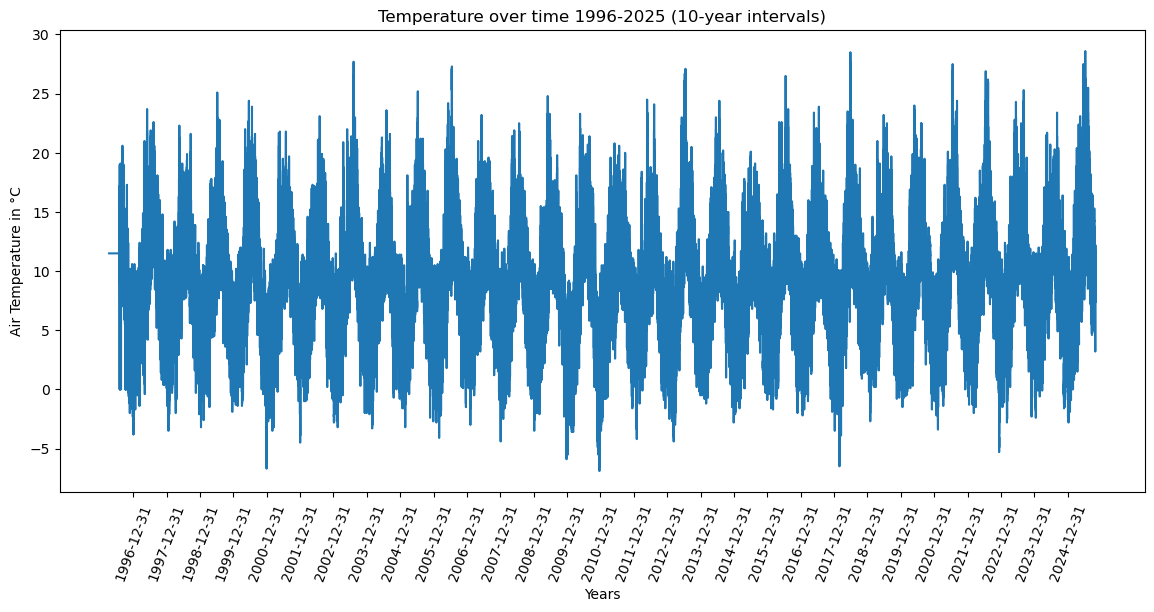

In [151]:
# plot 
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='temp')
plt.xticks(pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='1Y'))
plt.xticks(rotation=70)
plt.xlabel('Years')
plt.ylabel('Air Temperature in °C')
plt.title('Temperature over time 1996-2025 (10-year intervals)')

plt.show()

# https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
# https://saturncloud.io/blog/getting-min-and-max-dates-from-a-pandas-dataframe/
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.htmls


#### 1.1. Temperature **_1996-2025_** ~ highlight **_2020_**

C:\Users\marou\AppData\Local\Temp\ipykernel_27184\3876183273.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='1Y'))


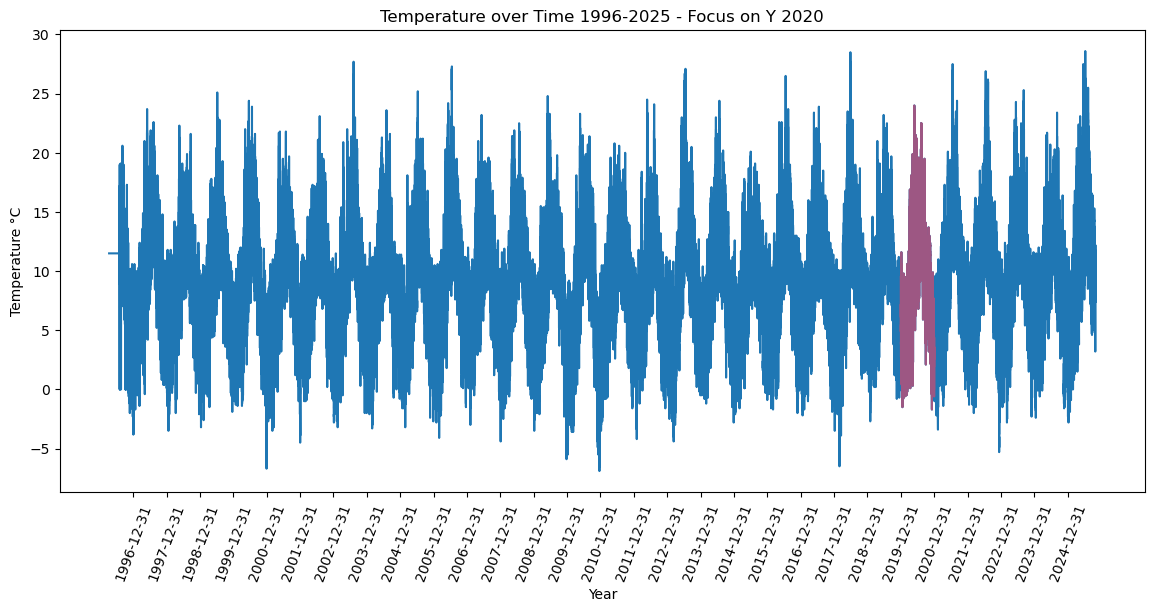

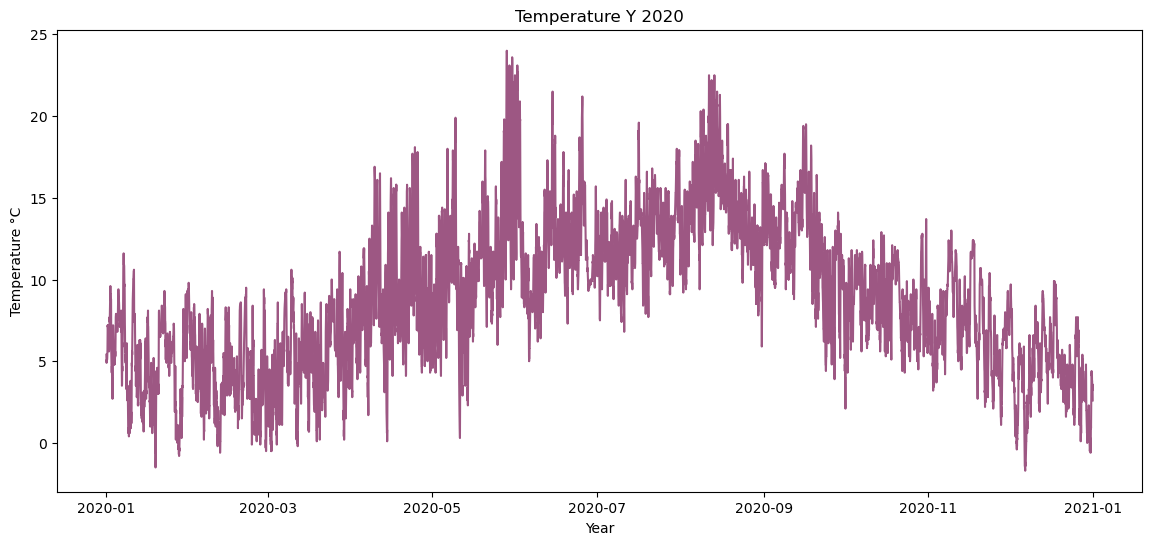

In [152]:
# limit the date range
dateFrom = "2020-01-01 01:00:00"
dateTo = "2021-01-01 01:00:00"

# plot 
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='temp')
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="temp",color= "#9d5783")
plt.xlabel('Year')
plt.xticks(pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='1Y'))
plt.xticks(rotation=70)
plt.ylabel('Temperature °C')
plt.title('Temperature over Time 1996-2025 - Focus on Y 2020')
plt.show()

# plot
plt.figure(figsize=(14,6))
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="temp", color= "#9d5783" )
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.title('Temperature Y 2020')
plt.show()

### 1.2 Daily Mean Temperature  

In [153]:
# resample hourly temperature to daily mean temeprature. Each row now represents a calendar day 24H with its mean temperature 
d_mean_temperature = df['temp'].resample("D").mean()
# show daily mean temperature. I can see the result is a series indexed by dates.  
d_mean_temperature

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

date
1996-04-10    11.500000
1996-04-11          NaN
1996-04-12          NaN
1996-04-13          NaN
1996-04-14          NaN
                ...    
2025-10-28     8.604167
2025-10-29     6.612500
2025-10-30     7.887500
2025-10-31     9.670833
2025-11-01     7.400000
Freq: D, Name: temp, Length: 10798, dtype: float64

In [154]:
# seaborn plots columns not index values. Index resetting tursn index into a normal column for plotting. 
daily_df = d_mean_temperature.reset_index()
daily_df.columns = ['date', 'temp_daily_mean']
# show updated df 
daily_df

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

,date,temp_daily_mean
0,1996-04-10,11.500000
1,1996-04-11,NaN
2,1996-04-12,NaN
3,1996-04-13,NaN
4,1996-04-14,NaN
...,...,...
10793,2025-10-28,8.604167
10794,2025-10-29,6.612500
10795,2025-10-30,7.887500
10796,2025-10-31,9.670833


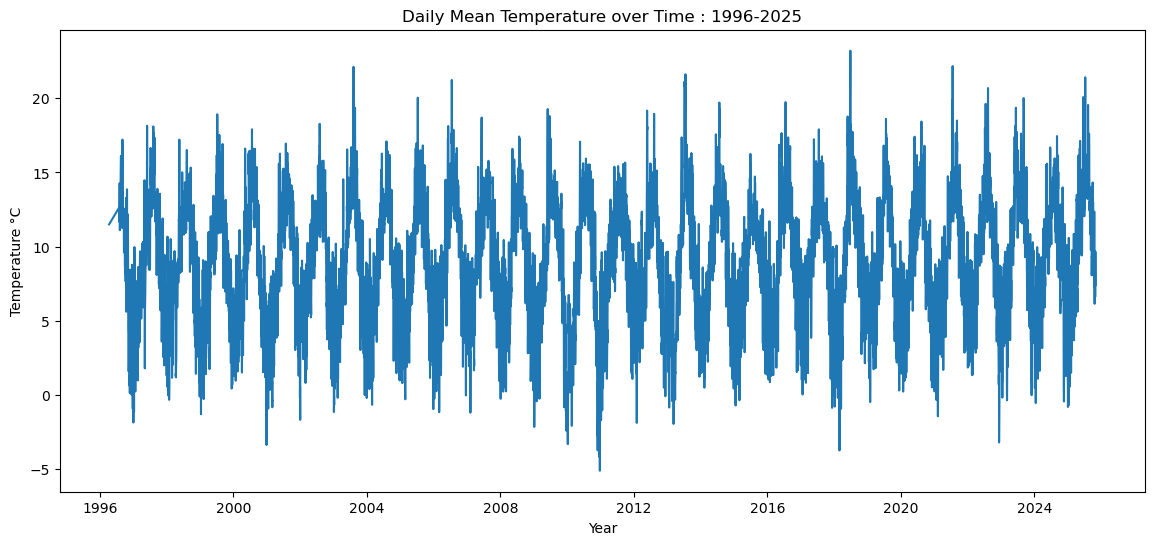

In [155]:
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_df, x='date', y='temp_daily_mean')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.title('Daily Mean Temperature over Time : 1996-2025')
plt.show()



### 1.3 Monthly Mean Temperature 

In [156]:
# resample hourly temperature to monthly mean temeprature. Each row now represents a month with its mean temperature 
m_mean_temperature = df['temp'].resample("M").mean()

# show monthly mean temperature. I can see the result is a series indexed by dates.  
m_mean_temperature

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

C:\Users\marou\AppData\Local\Temp\ipykernel_27184\2143005965.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  m_mean_temperature = df['temp'].resample("M").mean()


date
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
                ...    
2025-07-31    15.068280
2025-08-31    15.178495
2025-09-30    11.368056
2025-10-31     9.900134
2025-11-30     7.400000
Freq: ME, Name: temp, Length: 356, dtype: float64

In [157]:
# to plot with Seaborn, the dates must be regular columns not index values. The reset index is here used to convert the index into a normal column for sns plotting purposes. 


monthly_df = m_mean_temperature.reset_index()
monthly_df.columns = ['date', 'temp_monthly_mean']


# show updated df 
monthly_df

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

,date,temp_monthly_mean
0,1996-04-30,11.500000
1,1996-05-31,NaN
2,1996-06-30,NaN
3,1996-07-31,12.650000
4,1996-08-31,12.946909
...,...,...
351,2025-07-31,15.068280
352,2025-08-31,15.178495
353,2025-09-30,11.368056
354,2025-10-31,9.900134


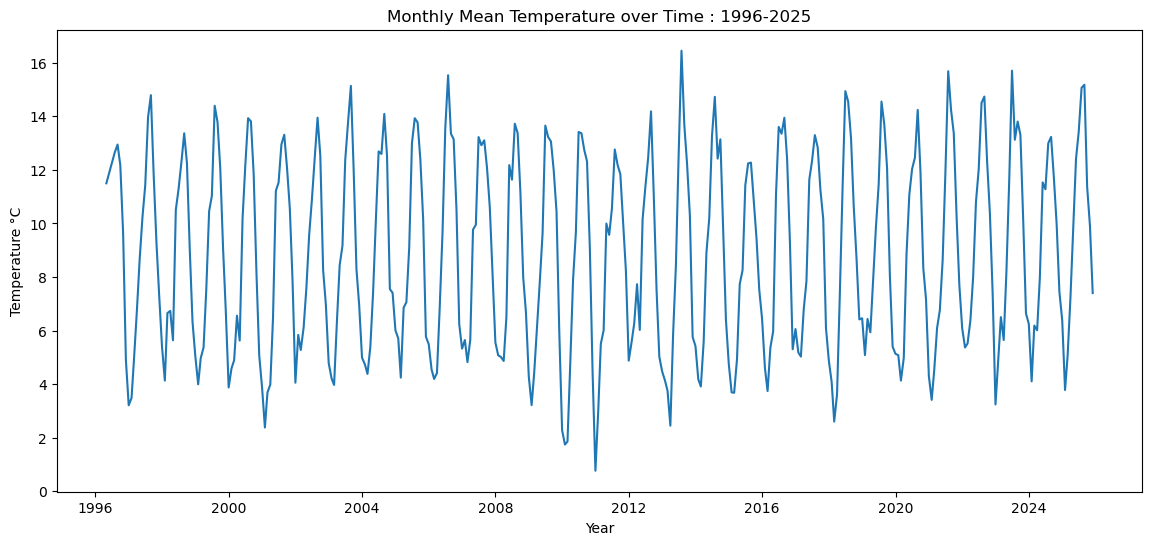

In [158]:
plt.figure(figsize=(14,6))
sns.lineplot(data= monthly_df, x='date', y='temp_monthly_mean')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.title('Monthly Mean Temperature over Time : 1996-2025')
plt.show()


## Part II : Windspeed    
___

### 2.1 Windspeed _1996-2025_   

In [159]:
# checking for missing values from the entire df, the output doesnt retun any because the original missing values were filled with space. 
print(df.isna().sum())


ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
date     0
dtype: int64


In [160]:
# this method only replaces the cells with values that are exactly one space charcter.  SO this method catches only very simple missing values.
df.replace(' ', np.nan, inplace=True)

In [161]:
# replace any cells that contains whitespace ( spaces, tabs ..) with NaN
df.replace(r'^\s*$', np.nan, regex=True)


# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html#pandas.DataFrame.isnull
# https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,date
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,...,0,0,0,25,81,0.0,35000,32,5,1996-04-10 14:00:00
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,0,25,82,0.0,40000,45,5,1996-07-31 08:00:00
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,0,80,81,0.0,8000,32,7,1996-07-31 09:00:00
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,0,0,25,82,0.0,28000,35,6,1996-07-31 10:00:00
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,...,0,0,0,2,11,0.0,40000,40,6,1996-07-31 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-31 20:00:00,0,0.0,0,8.6,0,7.8,6.8,9.9,89,984.0,...,13,2,160,NaN,NaN,0.0,35000,90,8,2025-10-31 20:00:00
2025-10-31 21:00:00,0,0.0,0,8.3,0,7.8,7.2,10.2,93,983.5,...,13,2,160,NaN,NaN,0.0,22000,90,8,2025-10-31 21:00:00
2025-10-31 22:00:00,0,0.5,0,7.8,0,7.6,7.3,10.3,97,983.1,...,10,2,160,NaN,NaN,0.0,6000,43,8,2025-10-31 22:00:00


In [162]:
# check the rows with NaN values, to confirm if the space was indeed replaced by NaN values.
df.head(1400)[df.head(1400).isna().any(axis=1)]

# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,date
date,,,,,,,,,,,,,,,,,,,,,
1996-08-01 22:00:00,8,NaN,0,10.8,0,10.6,10.4,12.6,97,1019.6,...,NaN,7,NaN,25,82,0.0,30000,20,7,1996-08-01 22:00:00
1996-08-04 21:00:00,0,0.0,0,0.0,0,0.0,0.0,6.1,100,NaN,...,11,2,150,NaN,NaN,0.0,NaN,NaN,NaN,1996-08-04 21:00:00
1996-08-07 03:00:00,0,0.0,0,0.0,0,0.0,0.0,6.1,100,NaN,...,4,2,200,NaN,NaN,0.0,NaN,NaN,NaN,1996-08-07 03:00:00
1996-08-09 00:00:00,0,0.0,0,0.0,0,0.0,0.0,6.1,100,NaN,...,7,2,180,NaN,NaN,4.9,NaN,NaN,NaN,1996-08-09 00:00:00
1996-08-19 01:00:00,0,0.5,0,0.0,0,0.0,0.0,6.1,100,NaN,...,5,2,160,NaN,NaN,0.0,NaN,NaN,NaN,1996-08-19 01:00:00
1996-09-27 13:00:00,8,NaN,0,11.6,0,10.0,8.4,11.0,81,1006.6,...,NaN,7,NaN,80,81,0.2,10000,20,7,1996-09-27 13:00:00


In [163]:
# show the missing values, now windspeed (wdsp) shows 50
print(df.isna().sum())


ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       61598
w        61599
sun          0
vis      64759
clht        18
clamt       18
date         0
dtype: int64


In [198]:
# remove rows witn NaN values. After dropping, the length is 256384, which is 50 less than the original, showing 50 NaNs were indeed removed. 
df.dropna(inplace=True)

In [199]:
# change windspeed Dtype into float instead of object
df['wdsp'] = df['wdsp'].astype('float64') 

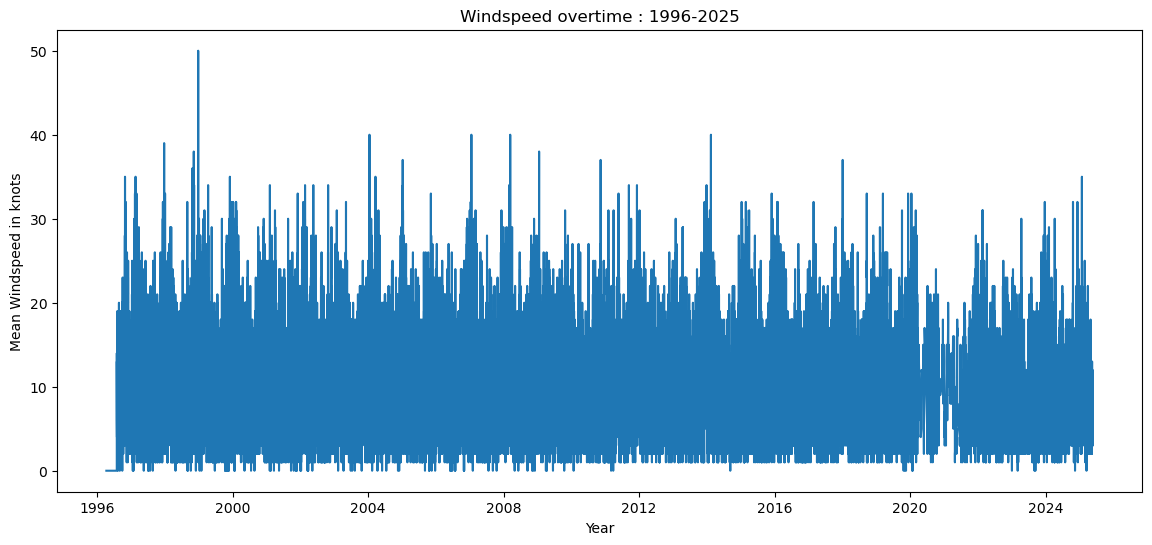

In [200]:
# plot windspeed overtime
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='wdsp')
plt.xlabel('Year')
plt.ylabel('Mean Windspeed in knots')
plt.title('Windspeed overtime : 1996-2025')
plt.show()


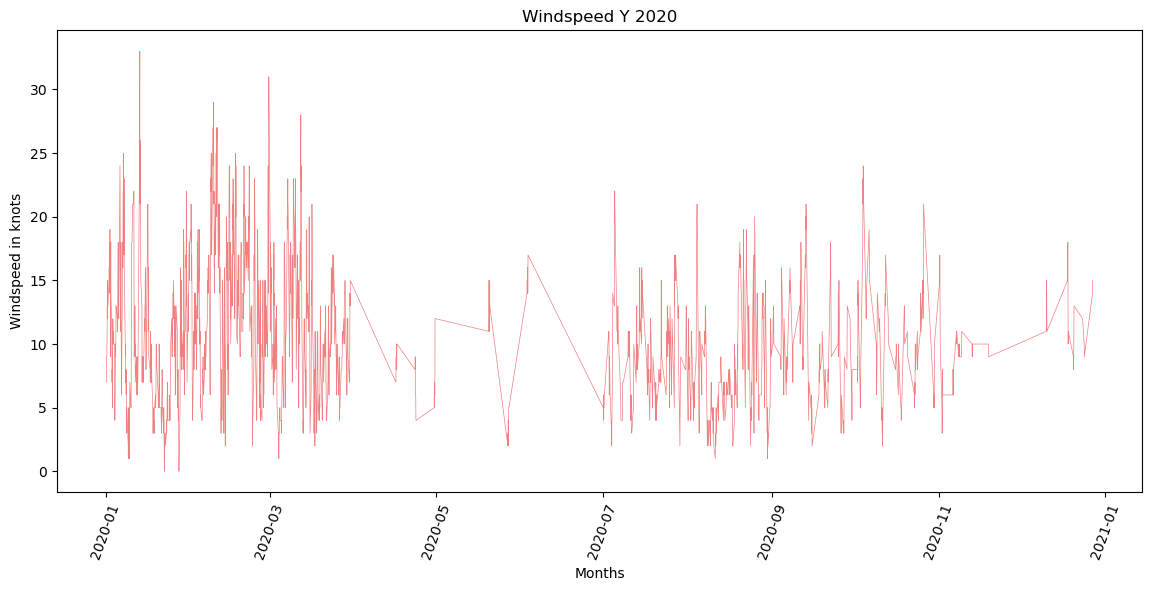

In [206]:
# limit the date range
dateFrom = "2020-01-01 01:00:00"
dateTo = "2021-01-01 01:00:00"

# plot 
plt.figure(figsize=(14,6))
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="wdsp",color= "lightcoral", linewidth=0.5 )
plt.xlabel('Months')
plt.xticks(rotation=70)
plt.ylabel('Windspeed in knots')
plt.title('Windspeed Y 2020')
plt.show()




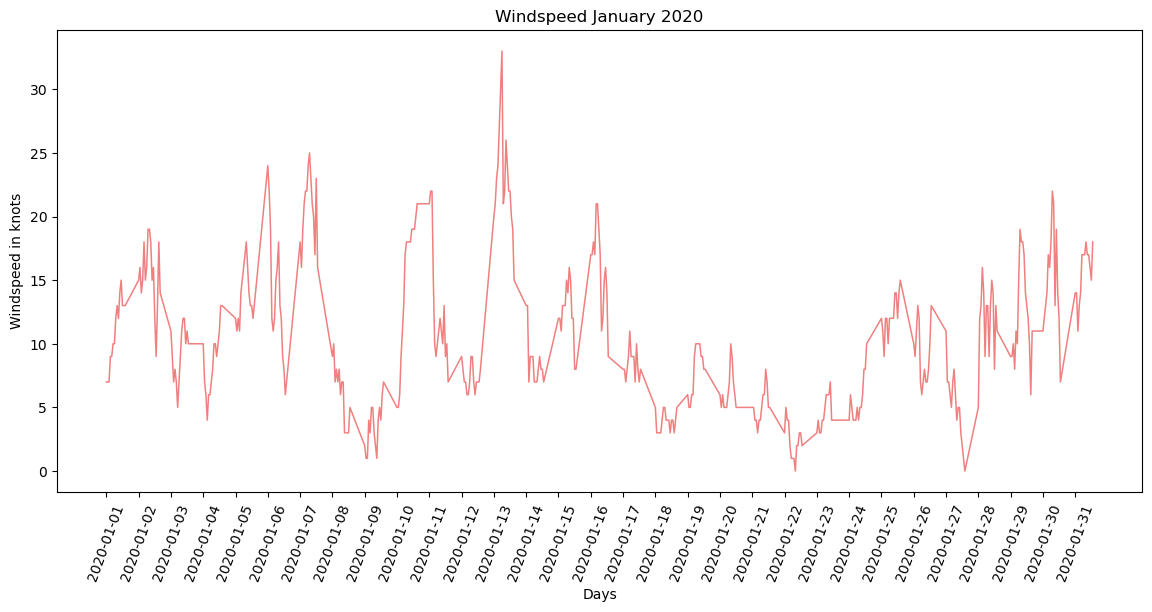

In [210]:
# limit the date range
dateFrom = "2020-01-01 01:00:00"
dateTo = "2020-02-01 01:00:00"

# plot 
plt.figure(figsize=(14,6))
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="wdsp",color= "lightcoral", linewidth= 1.1 )
plt.xlabel('Days')
plt.xticks(pd.date_range(df.loc[dateFrom:dateTo]['date'].min(), df.loc[dateFrom:dateTo]['date'].max(),freq='D'))
plt.xticks(rotation=70)
plt.ylabel('Windspeed in knots')
plt.title('Windspeed January 2020')
plt.show()




### 2.2 The rolling windspeed (say over 24 hours)

In [225]:
# rolling windspeed over 24H
# this solution was generated by AI (chat GPT) in response to the prompt : " hwo to calculate a windspeed for rolling 24H"
df['rolling_24_windspeed'] = df['wdsp'].rolling(window=24).mean()

<Axes: xlabel='date', ylabel='rolling_24_windspeed'>

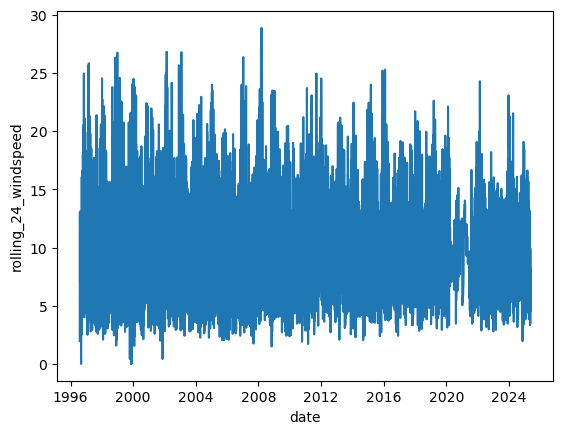

In [226]:
# plot
sns.lineplot(data=df, x='date', y=df['rolling_24_windspeed'])


# https://www.geeksforgeeks.org/python/pandas-rolling-mean-by-time-interval/
